# 2o Lab de PSD


### Número do Grupo : 2


In [ ]:
#
# Importa os pacotes necessários
#
import numpy as np
import matplotlib.pyplot as plt

#
# Descomentar a linha abaixo para instalar o pacote opencv-python
# !pip install opencv-python
#
import cv2

from pathlib import Path

from google.colab.patches import cv2_imshow



# PROBLEMA 1
Dada uma imagem $f$ e um filtro $w$ de tamanho $(a+1)\times (b+1)$, a correlação-cruzada para cada pixel $(x,y)$ da imagem é calculada pela fórmula
\begin{equation}
g(x,y)=\sum_{s=0}^{a}\sum_{t=0}^{b}w(s,t)f(x+s-\frac{a}{2}, y+t-\frac{b}{2})
\end{equation}

LEMBRETE:

$x$ e $y$ correspondem aos índices da linha e coluna da imagem que está sendo analisada

$s$ e $t$ correspondem aos índes da linha e coluna do filtro

$a$ é o número de linhas do filtro menos 1

$b$ é o número de colunas do filtro menos 1

## Parte a - preenche as partes faltantes do código abaixo

OBS: Leia com **muita atenção** os comentários presentes no código

In [ ]:
#
# Calcula a correlação cruzada entre a imagem img e o filtro w
#
# Parâmetros
#    img : numpy array. Imagem a ser filtrada.
#    w   : numpy array. Filtro a ser utilizado na correlação cruzada
#
# Saída:
#    img_filtered : numpy array. Image filtrada de mesmo tamanho que a imagem de entrada
#
def correlation(img, w):
    #
    # Obtendo informações do tamanho de img e w
    #
    img_rows, img_cols = img.shape
    w_rows, w_cols = w.shape   # w_rows = a+1 e w_cols = b+1 (a e b na fórmula acima)

    half_w_rows = w_rows//2    # O operador // retorna a parte inteira da divisão
    half_w_cols = w_cols//2

    #
    # Usando as informações acima, criar uma imagem de nome "img_padded" (de mesmo tipo
    # da imagem de entrada) que correspondem à imagem de entrada "img" com zeros em suas bordas - "zero padding"
    #
    # OBS: "Não utilizar" a função pad do pacote numpy
    # DICA: Usar a função "zeros" do pacote numpy
    #
    img_padded_rows = img_rows + half_w_rows*2
    img_padded_cols = img_cols + half_w_cols*2
    img_padded = np.zeros((img_padded_rows, img_padded_cols), dtype=img.dtype)
    for i in range(0, img_rows):
      for j in range(0, img_cols):
        img_padded[i+half_w_rows, j+half_w_cols] =  img[i,j]

    # Cria imagem de saída com pixels de valor zero
    img_filtered = np.zeros((img_rows, img_cols), dtype=img.dtype)

    #
    # Implementar os loops aninhados necessários para a implementação da fórmula de correlação
    #
    # DICA: Loops externos -> percorrerm pixels da imagem; Loops internos -> percorrem coeficientes do filtro
    #

    for x in range(img_rows):
      for y in range(img_cols):
        aux = 0
        for s in range(w_rows):
          for t in range(w_cols):
            aux += w[s,t]*img_padded[x+s, y+t]
        img_filtered[x,y] = aux




    return img_filtered

In [ ]:
#
# Calcula a convolução entre a imagem img e o filtro w
#
# Parâmetros de entrada:
#    img : numpy array. Imagem a ser filtrada.
#    w   : numpy array. Filtro a ser utilizado na correlação cruzada
#
# Saída:
#    img_filtered : numpy array. Image filtrada de mesmo tamanho que a imagem de entrada
#
def convolution(img, w):

    w = np.flip(w)
    img_filtered = correlation(img, w)

    return img_filtered

## Teste do código: Correlação entre sinal e filtro 1D

In [ ]:
# Sinal artificial 1D. Como a função acima foi implementada para arrays 2D,
# nosso sinal 1D será representado por uma matriz de uma única linha
sinal = np.array([[2, 3, 1, 4, 3, 2, 1, 1, 2]])

# filtro
w = np.array([[1, 2, 3]])

# chamada da função criada anteriormente
img_filtered = correlation(sinal, w)

# imprime resultado.
print(img_filtered)

#
# O resultado deve gerar a seguinte sequência [[13. 11. 17. 18. 16. 10.  7.  9.  5.]]
#

[[0 2 3 1 4 3 2 1 1 2 0]]
[[13 11 17 18 16 10  7  9  5]]


## Teste do código: Comparação entre correlação e convolução

In [ ]:
#
# Analise o código abaixo com muita atenção
#

img = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0]])
w = np.array([[1, 2, 3, 4]])

img_corr_w = correlation(img, w)
w_corr_img = correlation(w, img)

print('img_corr_w:')
print(img_corr_w)
print('w_corr_img:')
print(w_corr_img)

img_conv_w = convolution(img, w)
w_conv_img = convolution(w, img)

print('img_conv_w:')
print(img_conv_w)
print('w_conv_img:')
print(w_conv_img)

#
# O código dever gerar a seguinte saída
#
# img_corr_w:
# [[0. 0. 0. 4. 3. 2. 1. 0. 0.]]
# w_corr_img:
# [[1. 2. 3. 4.]]
# img_conv_w:
# [[0. 0. 0. 1. 2. 3. 4. 0. 0.]]
# w_conv_img:
# [[1. 2. 3. 4.]]

[[0 0 0 0 0 0 1 0 0 0 0 0 0]]
[[0 0 0 0 1 2 3 4 0 0 0 0]]
img_corr_w:
[[0 0 0 4 3 2 1 0 0]]
w_corr_img:
[[1 2 3 4]]
[[0 0 0 0 0 0 1 0 0 0 0 0 0]]
[[0 0 0 0 1 2 3 4 0 0 0 0]]
img_conv_w:
[[0 0 0 1 2 3 4 0 0]]
w_conv_img:
[[1 2 3 4]]


## Parte b - filtro da média simples aplicado a uma imagem

In [ ]:
#
# Leitura de uma imagem
#
# Note que a função imread retorna um "numpy array" que representa a imagem ou "None"
# se a imagem não puder ser carregada.
#
img = cv2.imread("general.jpg", cv2.IMREAD_GRAYSCALE)
print(type(img))

# Visualiza a imagem original
cv2_imshow(img)

#
# Defina um "box filter" do tipo matrix "numpy array" de tamanho 3x3
#

box_filter = np.ones((3,3),np.float32)/9

# Chama função de correlação
img_filtered = correlation(img, box_filter)


# Visualiza a imagem filtrada
cv2_imshow(img_filtered)
# A função abaixo espera até que uma tecla seja pressionada para então continuar
cv2.waitKey(0)
# e então finaliza (destroi e fecha) todas as janelas abertas
cv2.destroyAllWindows()


## PROBLEMA 2

**Template Matching** é uma técnica comumente utilizada em visão computacional para localizar uma "imagem template" $t$ dentro de uma imagem $f$. Essa técnica é implementada usando a operação de correlação cruzada (**cross-correlation**) normalizada, que é calculada usando a seguinte equação:

\begin{equation}
N_{tf}[x,y]=\frac{\sum_{s=0}^{a}\sum_{t=0}^{b}f(x+s-\frac{a}{2}, y+t-\frac{b}{2})\: t(s,t)}{\sqrt{\sum_{s=0}^{a}\sum_{t=0}^{b}f^2(x+s-\frac{a}{2}, y+t-\frac{b}{2})}\: \sqrt{\sum_{s=0}^{a}\sum_{t=0}^{b}t^2(s,t)}}
\end{equation}


## Parte a - estude o código abaixo, analisando com a função acima foi implementada

In [ ]:
#
# Normalised Cross Correlation
#
def Normalised_Cross_Correlation(roi, target):
    # Normalised Cross Correlation Equation
    cor = np.sum(roi * target)
    nor = np.sqrt( (np.sum(roi ** 2))) * np.sqrt(np.sum(target ** 2))

    return cor / nor

In [ ]:
#
# Template Matching
#
def template_matching(img, target):
    # initial parameter
    height, width = img.shape
    tar_height, tar_width = target.shape
    (max_Y, max_X) = (0, 0)
    MaxValue = 0

    # Set image, target and result value matrix
    img = np.array(img, dtype="int")
    target = np.array(target, dtype="int")
    NccValue = np.zeros((height-tar_height, width-tar_width))

    # calculate value using filter-kind operation from top-left to bottom-right
    for y in range(0, height-tar_height):
        for x in range(0, width-tar_width):
            # image roi
            roi = img[y : y+tar_height, x : x+tar_width]
            # calculate ncc value
            NccValue[y, x] = Normalised_Cross_Correlation(roi, target)
            # find the most match area
            if NccValue[y, x] > MaxValue:
                MaxValue = NccValue[y, x]
                (max_Y, max_X) = (y, x)

    return (max_X, max_Y)

In [ ]:
#
# Encontrando o Waldo na imagem
#
image  = cv2.imread("general.jpg", cv2.IMREAD_GRAYSCALE)
target = cv2.imread("queixo.jpg", cv2.IMREAD_GRAYSCALE)

height, width = target.shape

# Chamada da técnica template matching
top_left = template_matching(image, target)

# Desenha um retângulo na região do resultado
cv2.rectangle(image, top_left, (top_left[0] + width, top_left[1] + height), 0, 2)

# Visualiza a imagem filtrada
cv2_imshow(image)
# A função abaixo espera até que uma tecla seja pressionada para então continuar
cv2.waitKey(0)
# e então finaliza (destroi e fecha) todas as janelas abertas
cv2.destroyAllWindows()

## Parte b - Template Matching usando opencv

Usando a função **matchTemplate** do pacote opencv (https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html) crie um programa que faça o mesmo que o código acima.

OBS: Analise o resultado de cada uma das 6 variações do Template Matching disponíveis no opencv.

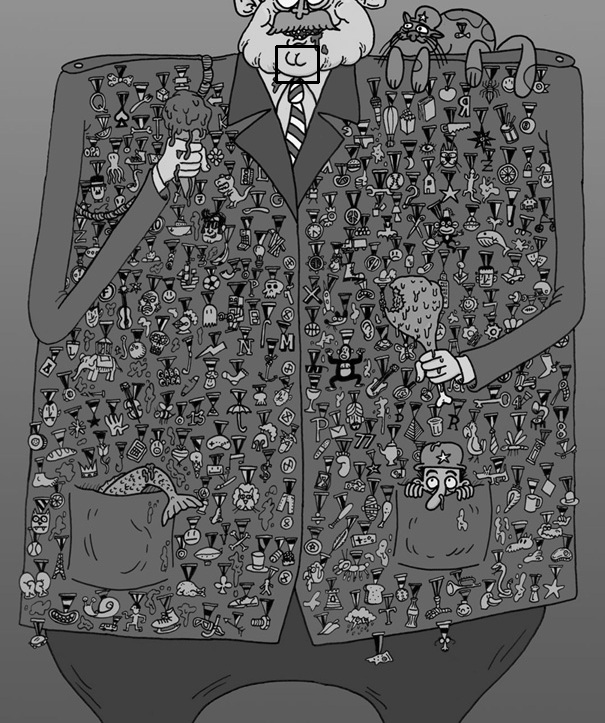

In [ ]:
#image  = cv2.imread("general.jpg", cv2.IMREAD_GRAYSCALE)
#target = cv2.imread("queixo.jpg", cv2.IMREAD_GRAYSCALE)

image  = cv2.imread("general.jpg", cv2.IMREAD_GRAYSCALE)
target = cv2.imread("queixo.jpg", cv2.IMREAD_GRAYSCALE)

height, width = target.shape

result = cv2.matchTemplate(image,target,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc


cv2.rectangle(image, top_left, (top_left[0] + width, top_left[1] + height), 0, 2)
# Visualiza a imagem filtrada
cv2_imshow(image)
# A função abaixo espera até que uma tecla seja pressionada para então continuar
cv2.waitKey(0)
# e então finaliza (destroi e fecha) todas as janelas abertas
cv2.destroyAllWindows()
